<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>¿Caro o Barato? Análisis de Precios de Almacen en un Contexto Inflacionario</h1>
<h3>Análisis y Visualización</h3>
</center>
</left>
<h4>Sofía Luján y Julieta Bergamasco</h4>
</left>

__[Proyecto para Mentoría](https://sites.google.com/view/mentorias2020-diplodatos/caro-o-barato-an%C3%A1lisis-de-precios-de-almac%C3%A9n-en-un-contexto-inflacionari?authuser=0)__


# Introducción

En la siguiente notebook, realizaremos la carga del **dataset** que utilizarán para el práctico de Análisis y Visualización. Para ello, comenzaremos con las importaciones pertinentes.<br>
Posteriormente, se detallarán las consignas a seguir para la elaboración del informe.

Recuerden que el **objetivo final de este proyecto** es encontrar una forma de identificar si un producto está caro o barato, no en una sucursal puntual, sino dada una región o ciudad.

# Importaciones y Lectura de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
from io import StringIO
import plotly.express as px
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Para mejorar la estetica de los graficos
sns.set(style="darkgrid")

In [ ]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [ ]:
file_name = '/content/drive/My Drive/precio_sucursal_producto.zip'
precio_sucursal_producto = pd.read_pickle(file_name)

In [ ]:
# Comprobamos si se importo correctamente el dataset
precio_sucursal_producto.sample(5)

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,cantidad,unidad,nombre_sin_um
1235881,88.00000,7792180133007,10-1-142,20200426,BOX,Pasta con Salsa Fileto Box 64 Gr,64.0 gr,NaN,NaN,NaN,10.00000,1.00000,Hipermercado Carrefour,INC S.A.,AR-V,Río Grande,Av. San Martín 685,-53.78501,-67.70299,Río Grande,Supermercado,Tierra del Fuego,Patagonia,64.00000,gr,Pasta con Salsa Fileto Box
1542580,199.00000,7790520001337,9-1-860,20200502,OFF!,Repelente en Aerosol Off Extra Duracion 165 Cc,165.0 cc,NaN,NaN,NaN,9.00000,1.00000,Vea,Jumbo Retail Argentina S.A.,AR-D,SAN LUIS,Av. Julio A. Roca Esq. Av. Juan D. Peron 0,-33.30650,-66.32360,Vea 52.,Supermercado,San Luis,Cuyo,165.00000,cc,Repelente en Aerosol Off Extra Duracion
90764,128.90000,7790040930605,44-1-8,20200412,RUMBA,Galletitas Chocolate con Relleno de Coco Rumba...,336.0 gr,NaN,NaN,NaN,44.00000,1.00000,SUPERMERCADOS EL NENE,Supermercado El Nene S.A.,AR-B,LA PLATA,Avenida 528 Bis 331,-34.88920,-57.96417,AUTOSERVICIO M Y C,Supermercado,Provincia de Buenos Aires,Centro,336.00000,gr,Galletitas Chocolate con Relleno de Coco Rumba...
1461233,179.00000,7613034638274,49-1-2,20200502,NESCAFÉ,Cafe Instantaneo Torrado Suave NesCafe Dolca 1...,100.0 gr,NaN,NaN,NaN,49.00000,1.00000,Super Tuti1 y Super Tuti 3,ARNALDO P. APPELLA S.A.,AR-B,9 de Julio,Av. 25 De Mayo Y Garmendia 0,-35.43792,-60.88943,Super TUTI 3,Supermercado,Provincia de Buenos Aires,Centro,100.00000,gr,Cafe Instantaneo Torrado Suave NesCafe Dolca
1152163,161.59000,7790975017471,6-1-26,20200426,LATITUD 33,Vino Blanco Chardonnay Latitud 33 750 Ml,750.0 ml,NaN,NaN,NaN,6.00000,1.00000,Supermercados Comodin,Alberdi S.A.,AR-T,San Miguel de Tucumán,Avda. Alem Esq. Lavaissé 1796,-26.85273,-65.22434,Comodin 26,Supermercado,Tucumán,Norte Grande,750.00000,ml,Vino Blanco Chardonnay Latitud 33


# Consigna para Informe de Análisis y Visualización

## 1. General

Se propone la **elaboración de un informe** que deberá entregarse en formato html o pdf y deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.<br>
La estructura del mismo puede seguir un esquema de secciones como el siguiente: **Introducción - Presentación del Dataset - Variables más relevantes o de interés - Respuestas a preguntas disparadoras - Relaciones interesantes entre variables - Principales conclusiones y posibilidad de futuros aportes**. No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes para comunicar.
Pueden tomar, a modo de ejemplo, __[esta publicación de Open Data](http://blog.opendatacordoba.org/estudio-sobre-el-aumento-de-precios-en-las-gondolas-entre-abril-y-mayo-del-2018/)__. *(Notar que el objetivo de este análisis es diferente al propuesto en este proyecto)*

## 2. Análisis Estadístico de Variables

Se propone que realicen un análisis estadístico riguroso de variables que seleccionen por ser de su interés o porque crean que son relevantes (entre 2 y 4), dentro de las cuales tiene que estar el precio. Deberán responder preguntas como:
- Qué **tipo de variable** es cada una?
- Existen **outliers** en las variables seleccionadas?
- Hay **valores faltantes**? Qué decisión tomarán al respecto en esta instancia de análisis? Es mejor descartarlos o completarlos con un valor particular?
- Cómo es la **distribución** de las variables en el dataset? Se distribuyen de manera normal? Qué implicancias tiene esto?
- Cómo es la **frecuencia** de las variables categóricas que seleccionaron?
- Cómo es la **distribución de precios condicionada** a otra variable?

En caso de calcular estadísticos, explicar por qué lo hicieron y su significado. Utilizar los gráficos apropiados para mostrar el análisis realizado.<br>
Además:
- Cuáles son las **características con más datos faltantes**?
- Entre qué variables existe más **correlación**?
- Analizar la dispersión de precios de un producto en todas las sucursales.

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

variables de interes seleccionadas: precio, fecha, nom_producto, region, cantidad, unidad, nom_sin_um

In [ ]:
# Primera aproximacion al dataset
print("Estructura del dataset:", precio_sucursal_producto.shape)
# Podemos observar que el mismo se compone de 2222411 registros en 26 columnas

Estructura del dataset: (2222411, 26)


In [ ]:
# Hacemos uso de la funcion .describe(include='all') para observar rapidamente los siguientes puntos:
# - Valores de dispersion y posicion de las variables numericas
# - Valores nulos (valores de la fila count que no sea igual a 2222411 indicaria que hay valores nulos)
precio_sucursal_producto.describe(include='all')
# Observar que es posible que las siguientes variables tengan valores nulos:
## - precio
## - categoria1, categoria2 y categoria3
## - todas las variables relacionadas al comercio y su geolocalizacion

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,cantidad,unidad,nombre_sin_um
count,2214788.00000,2222411,2222411,2222411,2222411,2222411,2222411,5,5,5,2202411.00000,2202411.00000,2202411,2202411,2202411,2202411,2202411,2202411.00000,2202411.00000,2202411,2202411,2202411,2202411,2222411.00000,2222411,2222411
unique,nan,71716,513,5,5644,63660,1168,2,2,2,nan,nan,45,34,24,309,491,nan,nan,464,4,24,4,nan,7,58270
top,nan,7793100111563,49-1-2,20200426,SIN MARCA,Edulcorante Liquido Hileret Zucra 200 Cc,1.0 kg,Perfumería y Cuidado Personal,Cuidado Capilar,Acondicionadores,nan,nan,Hipermercado Carrefour,INC S.A.,AR-B,LA PLATA,Av. 25 De Mayo Y Garmendia 0,nan,nan,Super TUTI 3,Supermercado,Provincia de Buenos Aires,Centro,nan,gr,Gaseosa Sprite
freq,nan,545,75516,478909,64702,723,109079,4,4,4,nan,nan,339572,556040,772902,161996,75516,nan,nan,75516,1098206,772902,1207678,nan,946281,1379
mean,185.68898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.52007,1.60538,NaN,NaN,NaN,NaN,NaN,-34.54504,-62.85409,NaN,NaN,NaN,NaN,241.19963,NaN,NaN
std,362.76836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.32286,1.09606,NaN,NaN,NaN,NaN,NaN,6.11064,4.05411,NaN,NaN,NaN,NaN,257.14402,NaN,NaN
min,0.12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-54.81010,-72.21356,NaN,NaN,NaN,NaN,0.80000,NaN,NaN
25%,66.90000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-36.60429,-65.45231,NaN,NaN,NaN,NaN,16.00000,NaN,NaN
50%,118.95000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-34.59195,-62.89345,NaN,NaN,NaN,NaN,150.00000,NaN,NaN
75%,214.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00000,2.00000,NaN,NaN,NaN,NaN,NaN,-31.55759,-58.62642,NaN,NaN,NaN,NaN,400.00000,NaN,NaN


In [ ]:
# Continuamos el analisis general viendo el tipo de datos de cada variable
precio_sucursal_producto.dtypes.reset_index()

,index,0
0,precio,float64
1,producto_id,object
2,sucursal_id,object
3,fecha,object
4,marca,object
5,nombre,object
6,presentacion,object
7,categoria1,object
8,categoria2,object
9,categoria3,object


##  Analisis de la Variable *sucursalTipo*

In [ ]:
# sucursalTipo es una variable categorica (dtype=objetc) por lo tanto procedemos a ver como se
# distribuyen los registros entre sus posibles valores
precio_sucursal_producto['sucursalTipo'].value_counts(dropna=False)

Supermercado    1098206
Hipermercado     968674
Autoservicio     129910
NaN               20000
Minorista          5621
Name: sucursalTipo, dtype: int64

In [ ]:
# A fines de lograr visualizar los valores nulos en un grafico, reemplazamos los valores NaN por la palabra "Nulo"
psp_suc_nulo = precio_sucursal_producto.copy()
psp_suc_nulo['sucursalTipo'].fillna(value='Nulos', inplace=True)

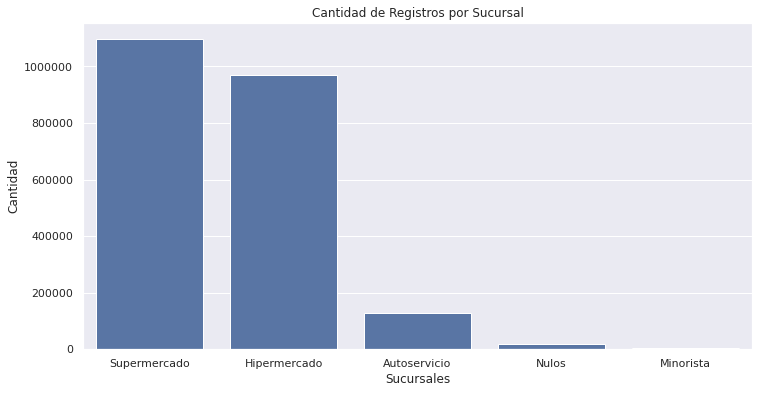

In [ ]:
# Graficamos
plt.figure(figsize=(12,6 ))
sns.countplot(x='sucursalTipo', data=psp_suc_nulo, color='b')
plt.title("Cantidad de Registros por Sucursal")
plt.xlabel("Sucursales")
plt.ylabel("Cantidad")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
# No se detecta la presencia de OUTLIERS

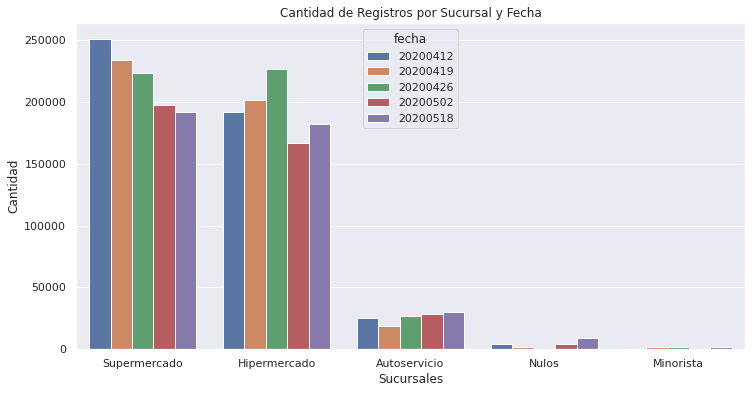

In [ ]:
# Veamos ahora como se comporta la variable si, además, le agregamos la fecha
plt.figure(figsize=(12,6))
sns.countplot(x='sucursalTipo', data=psp_suc_nulo, hue='fecha')
plt.title("Cantidad de Registros por Sucursal y Fecha")
plt.xlabel("Sucursales")
plt.ylabel("Cantidad")
plt.show()
# Podemos observar como la toma de registros fueu disminuyendo en los supermercados a lo largo de las fechas.
# En principio podriamos inferir que a medida que fue pasando el tiempo, los esfuerzos en la medicion se fueron
# inclinando hacia los hipermercados y cadenas de autoservicios. Llama la atencion cómo en Supermercados e 
# Hipermercados la toma de registros cae abruptamente el dia 20200502 (pos 1ro de Mayo)

##  Analisis de la variable *region*

In [ ]:
# region es una variable categorica (dtype=objetc) por lo tanto procedemos a ver como se
# distribuyen los registros entre sus posibles valores
precio_sucursal_producto['region'].value_counts(dropna=False)

Centro          1207678
Norte Grande     412417
Patagonia        400122
Cuyo             182194
NaN               20000
Name: region, dtype: int64

In [ ]:
# A fines de lograr visualizar los valores nulos en un grafico, reemplazamos los valores NaN por la palabra "Nulo"
psp_reg_nulo = precio_sucursal_producto.copy()
psp_reg_nulo['region'].fillna(value='Nulos', inplace=True)

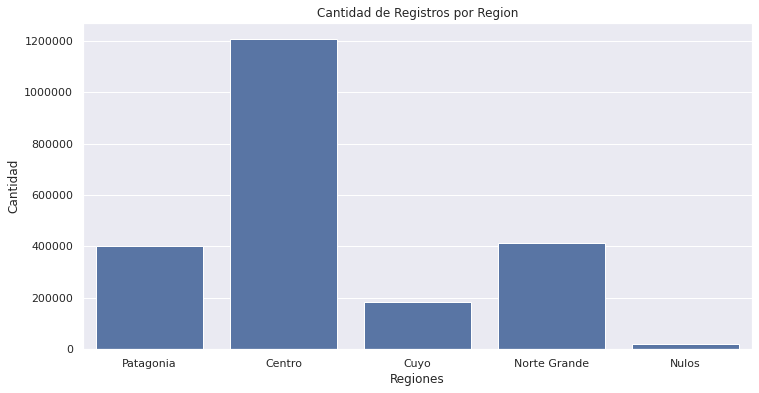

In [ ]:
# Graficamos
plt.figure(figsize=(12,6 ))
sns.countplot(x='region', data=psp_reg_nulo, color='b')
plt.title("Cantidad de Registros por Region")
plt.xlabel("Regiones")
plt.ylabel("Cantidad")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
# No se detecta la presencia de OUTLIERS

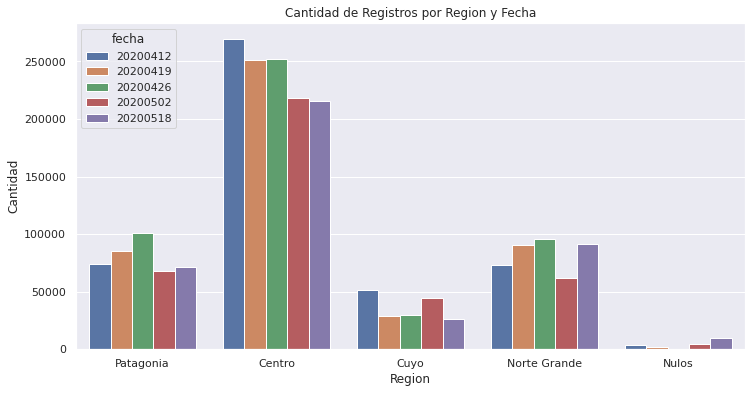

In [ ]:
# Veamos ahora como se comporta la variable si, además, le agregamos la fecha
plt.figure(figsize=(12,6))
sns.countplot(x='region', data=psp_reg_nulo, hue='fecha')
plt.title("Cantidad de Registros por Region y Fecha")
plt.xlabel("Region")
plt.ylabel("Cantidad")
plt.show()
# Resulta evidente cómo la toma de registro se concentra en la region Centro en comparacion con las otras regiones.

##  Analisis de la variable *nom_provincia*

In [ ]:
# nom_provincia es una variable categorica (dtype=objetc) por lo tanto procedemos a ver como se
# distribuyen los registros entre sus posibles valores
precio_sucursal_producto['nom_provincia'].value_counts(dropna=False)

Provincia de Buenos Aires          772902
Córdoba                            174414
Neuquén                            126637
Salta                              111214
Santa Fe                            96423
Mendoza                             94500
Río Negro                           94496
Tucumán                             89773
Santa Cruz                          70159
Ciudad Autónoma de Buenos Aires     67042
Chubut                              64386
San Luis                            58472
Entre Ríos                          58318
Corrientes                          47230
Jujuy                               45877
Tierra del Fuego                    44444
La Pampa                            38579
Catamarca                           35495
Misiones                            31423
San Juan                            21354
Chaco                               20105
NaN                                 20000
Formosa                             18181
Santiago del Estero               

In [ ]:
# A fines de lograr visualizar los valores nulos en un grafico, reemplazamos los valores NaN por la palabra "Nulo"
psp_prov_nulo = precio_sucursal_producto.copy()
psp_prov_nulo['nom_provincia'].fillna(value='Nulos', inplace=True)

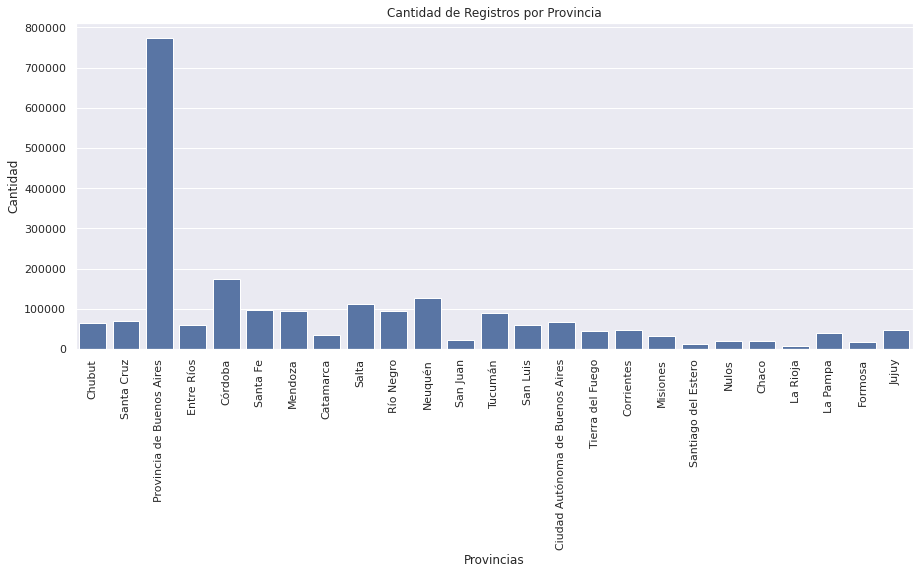

In [ ]:
# Graficamos
plt.figure(figsize=(15,6 ))
sns.countplot(x='nom_provincia', data=psp_prov_nulo, color='b')
plt.title("Cantidad de Registros por Provincia")
plt.xlabel("Provincias")
plt.ylabel("Cantidad")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()
# No se detecta la presencia de OUTLIERS
# Podemos ver como la toma de registros se concentra en Provincia Buenos Aires. 

## Analisis de la variable precio

In [ ]:
# precio es una variable numérica (dtype=float64) por lo tanto primero vamos a verificar la presencia
# de valores nulos
precio_sucursal_producto['precio'].isna().sum()
# Podemos observar que hay 7623 valores nulos para la variable precio, a diferencia de los 20000 valores nulos
# de las variables sucursalTipo y nom_provincia.

7623

In [ ]:
# Como el analisis a realizar esta centrado en la variable precio, vamos a situar la lupa en estos valores
# faltantes para ver si pueden ser descartados o no.
precio_sucursal_producto[precio_sucursal_producto.precio.isnull()].describe(include='all')
# Podemos ver de los 7623 registros con precios nulos, hay 5621 cuyo valor de comercio SI existe.

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,cantidad,unidad,nombre_sin_um
count,0.00000,7623,7623,7623,7623,7623,7623,0,0,0,5621.00000,5621.00000,5621,5621,5621,5621,5621,5621.00000,5621.00000,5621,5621,5621,5621,7623.00000,7623,7623
unique,nan,2273,5,4,441,2262,351,0,0,0,nan,nan,1,1,2,3,3,nan,nan,3,1,2,1,nan,7,2131
top,nan,7795735000236,65-1-328,20200502,COLGATE,Vainillas Valente 160 Gr,1.0 kg,NaN,NaN,NaN,nan,nan,Diarco,DIARCO,AR-B,S.F.Solano,Calle 897 - 2400 0,nan,nan,Calle 897 4322 (S.F.Solano),Minorista,Provincia de Buenos Aires,Centro,nan,gr,Vainillas Valente
freq,nan,4,3546,2124,138,8,478,NaN,NaN,NaN,nan,nan,5621,5621,5475,3546,3546,nan,nan,3546,5621,5475,5621,nan,3621,16
mean,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-34.70049,-58.59424,NaN,NaN,NaN,NaN,188.14179,NaN,NaN
std,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.10328,0.37832,NaN,NaN,NaN,NaN,215.92272,NaN,NaN
min,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-34.77948,-59.11662,NaN,NaN,NaN,NaN,1.00000,NaN,NaN
25%,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-34.77948,-59.11662,NaN,NaN,NaN,NaN,10.00000,NaN,NaN
50%,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-34.77948,-58.31558,NaN,NaN,NaN,NaN,110.00000,NaN,NaN
75%,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,1.00000,NaN,NaN,NaN,NaN,NaN,-34.56455,-58.31558,NaN,NaN,NaN,NaN,300.00000,NaN,NaN


In [ ]:
# Veamos como se distribuyen estos registros con precio nulo entre los comercios
precio_sucursal_producto['banderaDescripcion'][precio_sucursal_producto.precio.isnull()].value_counts(dropna=False).reset_index()\
    .rename(columns={'index':'Sucursal', 'banderaDescripcion':'cantidad'}, inplace=False)
# Podemos ver que de los precios faltantes, gran cantidad responden a Diarco y otros no tienen sucursal asignada.

,Sucursal,cantidad
0,Diarco,5621
1,NaN,2002


In [ ]:
# Veamos como se distribuyen estos registros con precio nulo entre las provincias
precio_sucursal_producto['nom_provincia'][precio_sucursal_producto.precio.isnull()].value_counts(dropna=False).reset_index()\
  .rename(columns={'index':'Pronvincia', 'nom_provincia':'cantidad'}, inplace=False)
# Podemos ver que de los precios faltantes, gran cantidad responden a Diarco y otros no tienen sucursal asignada.

,Pronvincia,cantidad
0,Provincia de Buenos Aires,5475
1,NaN,2002
2,Ciudad Autónoma de Buenos Aires,146


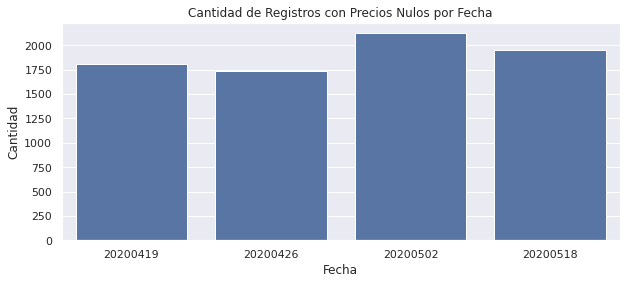

In [ ]:
# Veamos como se distribuyen estos registros con precio nulo entre las fechas
plt.figure(figsize=(10, 4))

sns.countplot(x='fecha', data=precio_sucursal_producto[precio_sucursal_producto.precio.isnull()], color='b')
plt.title("Cantidad de Registros con Precios Nulos por Fecha")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.show()
# Vemos que los registros con precios nulos aparecen en casi todas las fechas.

In [ ]:
# Rapidamente hacemos un zoom-in en la variable fecha
precio_sucursal_producto['fecha'].value_counts(dropna=False).reset_index(name='cantidad')
# Considerando los valores posibles de la variable fecha, podemos verificar que para la fecha 20200412 
# no existen registros con precio nulo. Dato interesante para analizar posteriormente.

,index,cantidad
0,20200426,478909
1,20200412,472131
2,20200419,458536
3,20200518,415101
4,20200502,397734


In [ ]:
# Veamos como se distribuyen estos registros con precio nulo entre las marcas
precio_sucursal_producto['marca'].value_counts(dropna=False).reset_index(name='cantidad')
# Observamos que no hay una marca particularmente afectada por la ausencia de precios.

,index,cantidad
0,SIN MARCA,64702
1,LOREAL,26580
2,ARCOR,26535
3,PANTENE,24952
4,DOVE,24665
...,...,...
5639,IL GENOVESE,1
5640,LABRORIER,1
5641,DILEXIS,1
5642,TITAN,1


In [ ]:
# Por ultimo, veamos aquellos registros que ademas de no tener precio tampoco tienen una sucursal asignada.
# Como vimos anteriormente estos son 2002 registros
filtro_precio = precio_sucursal_producto.precio.isnull()
filtro_sucursal = precio_sucursal_producto.sucursalTipo.isnull()
precio_sucursal_producto[(filtro_precio) & (filtro_sucursal)].describe(include='all')
# Rapidamente podemos ver que la totalidad de estos registros se reparte en solamente dos sucursales. 

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,cantidad,unidad,nombre_sin_um
count,0.00000,2002,2002,2002,2002,2002,2002,0,0,0,0.00000,0.00000,0,0,0,0,0,0.00000,0.00000,0,0,0,0,2002.00000,2002,2002
unique,nan,2001,2,2,416,1992,336,0,0,0,nan,nan,0,0,0,0,0,nan,nan,0,0,0,0,nan,7,1885
top,nan,7790520023858,65-1-317,20200502,COLGATE,Jabon en Barra Floral Lysoform 3 Un 270 Gr,1.0 un,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,nan,gr,Vainillas Valente
freq,nan,2,2001,2001,34,3,123,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,nan,958,4
mean,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,190.70310,NaN,NaN
std,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,215.87416,NaN,NaN
min,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,1.00000,NaN,NaN
25%,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,10.00000,NaN,NaN
50%,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,120.00000,NaN,NaN
75%,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,300.00000,NaN,NaN


In [ ]:
# Por último vamos a calcular la cantidad de precio con valores nulos y que porcentaje representa respecto
# del total de observaciones
print('Cantidad de Registros:', len(precio_sucursal_producto))
print('Cantidad de Registros con Precio Nulo:', precio_sucursal_producto['precio'].isna().sum())
ratio_precios_nulos = precio_sucursal_producto['precio'].isna().sum() / len(precio_sucursal_producto)* 100
print("Porcentaje de Precios Nulos:", ratio_precios_nulos,'%')
# Podemos observar que hay 7623 registros con precios nulos y representa un 0.344 % del total de registros

Cantidad de Registros: 2222411
Cantidad de Registros con Precio Nulo: 7623
Porcentaje de Precios Nulos: 0.34300586165205266 %


*El hecho de que los precios nulos se encuentren repartidos en diversas marcas y fechas, pero concentrados en una sucursal (Diarco), nos permite aventurar alguna que otra hipotesis centrada en el lugar de la toma del registro.*

*Analizados los registros con precios nulos, consideramos que es necesario continuar con nuestro analisis quitando estos registros ya que representan una cantidad infima de valores respecto al total de la muestra*

**Limpieza del dataset**



In [ ]:
print('Cantidad de Registros Antes Limpieza:', len(precio_sucursal_producto))
ds_psp = precio_sucursal_producto[precio_sucursal_producto.precio.notna()].copy()
print('Cantidad de Registros Despues Limpieza:', len(ds_psp))
print('Cantidad de Registros Limpiados:', len(precio_sucursal_producto) - len(ds_psp))

Cantidad de Registros Antes Limpieza: 2222411
Cantidad de Registros Despues Limpieza: 2214788
Cantidad de Registros Limpiados: 7623


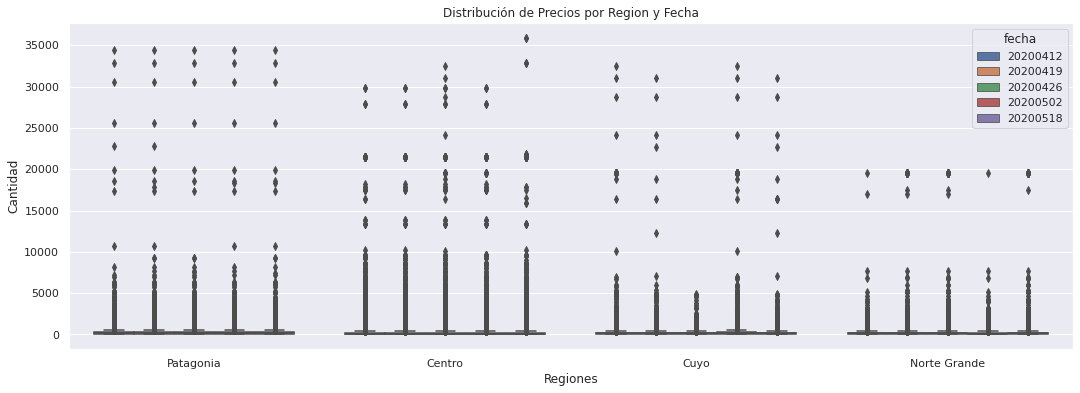

In [ ]:
# Anteriormente habiamos visualizado la cantidad de precios segun la region, sucursal y la fecha
# Ahora que tenemos el dataset limpio veamos como se DISTRIBUYEN los precios por region y por fecha
plt.figure(figsize=(18,6))
sns.boxplot(x='region', y='precio', hue='fecha', data=ds_psp)
plt.title("Distribución de Precios por Region y Fecha")
plt.xlabel("Regiones")
plt.ylabel("Cantidad")
plt.show()
# Resulta evidente que el rango de precios es muy extenso como para analizar en un grafico de este tipo.

In [ ]:
## Antes de continar con el analisis de la variable, veamos el top 5 de productos mas caros
ds_psp[['producto_id','nombre', 'precio', 'nom_provincia', 'sucursalNombre']].sort_values('precio', ascending=False)[:5]

,producto_id,nombre,precio,nom_provincia,sucursalNombre
1815078,0080432403518,Whisky Chivas Regal con Volca 4.5 Lt,35900.00000,Provincia de Buenos Aires,Super TUTI 3
1815079,0080432403518,Whisky Chivas Regal con Volca 4.5 Lt,35900.00000,Provincia de Buenos Aires,Super Todo
30971,5000299284926,Whisky 25 Años Chivas Regal 700 Ml,34417.15000,Neuquén,NEUQUEN
1834231,5000299284926,Whisky 25 Años Chivas Regal 700 Ml,34417.15000,Neuquén,NEUQUEN
1435661,5000299284926,Whisky 25 Años Chivas Regal 700 Ml,34417.15000,Neuquén,NEUQUEN


In [ ]:
## De igual manera veamos el top 5 de productos mas baratos
ds_psp[['producto_id','nombre', 'precio', 'nom_provincia', 'sucursalNombre']].sort_values('precio', ascending=True)[:5]

,producto_id,nombre,precio,nom_provincia,sucursalNombre
183694,7790580418700,Chicle Effect Frutilla Fire Caja Neo Gum 1 Un,0.12000,Provincia de Buenos Aires,LA AMISTAD
183186,7790580344108,Chicle Frutilla Melon Sandia Caja Neo Gum 1 Un,0.12000,Provincia de Buenos Aires,LA AMISTAD
183693,7790580418205,Chicle Mixer Tutti Lima Caja Neo Gum 1 Un,0.12000,Provincia de Buenos Aires,LA AMISTAD
183951,7790580454302,Chicle Frutilla en Caja Kung-Fu Panda2 1 Un,0.19000,Provincia de Buenos Aires,LA AMISTAD
183952,7790580454401,Chicle Menta en Caja Kung-Fu Panda2 1 Un,0.19000,Provincia de Buenos Aires,LA AMISTAD


In [ ]:
# Veamos como se distribuyen los precios a lo largo del dataset, para ellos debemos expresar los precios 
# de una manera uniforme ya que el precio de los productos varía en función de su presentación.
# Por ende tennemos que considerar las diferentes unidades de presentacion de los productos
ds_psp['unidad'].value_counts(dropna=False).reset_index()
# Podemos veer que existen 7 tipos de unidades y ningun registro con unidades nulas

,index,unidad
0,gr,942660
1,ml,380976
2,un,324116
3,cc,250038
4,lt,171168
5,kg,134400
6,mt,11430


*Continuando con el analisis anterior procedemos a normalizar las unidades de los productos y con ello su precio*

In [ ]:
# Funcion normalizadora de precios
# Primero expresamos las unidades en base a Kg, Lt, Un o Mt
# Luego calculamos el precio normalizado
def normalizar_precio(precio, unidad, cantidad):
    if unidad in ['kg', 'lt', 'un', 'mt']:
        cantidad_normalizada = 1 / cantidad
    elif unidad in ['gr', 'ml', 'cc']:
        cantidad_unitaria = cantidad / 1000
        cantidad_normalizada = 1 / cantidad_unitaria
    else:
        print(precio, unidad, cantidad)
    
    precio_normalizado = cantidad_normalizada * precio
    return precio_normalizado

In [ ]:
ds_psp['precio_normalizado'] = ds_psp.apply(lambda row: normalizar_precio(row['precio'], row['unidad'], row['cantidad']), axis=1)

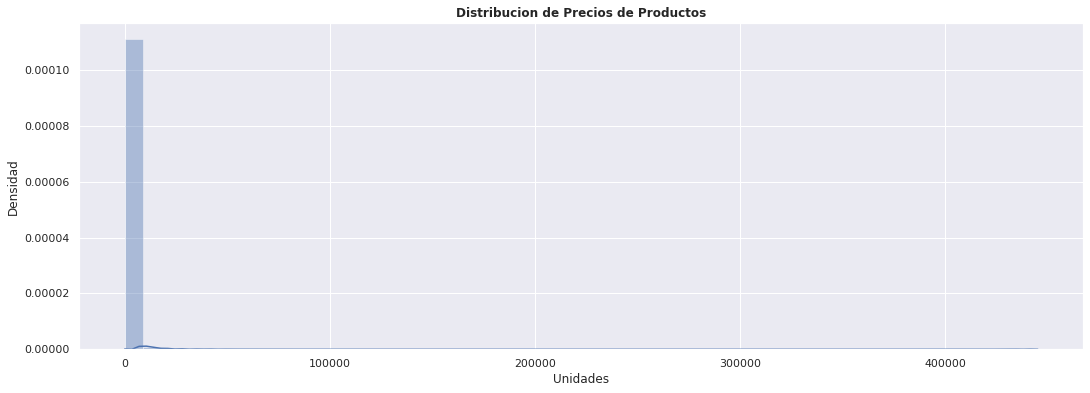

In [ ]:
# Con los precios normalizados, observamos la distribucion de los mismos en todo el dataset.
plt.figure(figsize=(18,6))
sns.distplot(ds_psp['precio_normalizado'])
plt.title("Distribucion de Precios de Productos", fontweight='bold', size='12')
plt.xlabel("Unidades")
plt.ylabel("Densidad")
plt.show()
# Resulta evidente que el rango de precios es muy extenso como para analizar, 
# por lo tanto procedemos a analizar los precios por intervalos

In [ ]:
# Creamos la funcion que nos retornará los intervalos
# Elejimos intervalos de 100
def to_categorical(column, bin_size=100, min_cut=0, max_cut=5000):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [ ]:
ds_psp["precio_intervalo"] = to_categorical(ds_psp['precio_normalizado'])

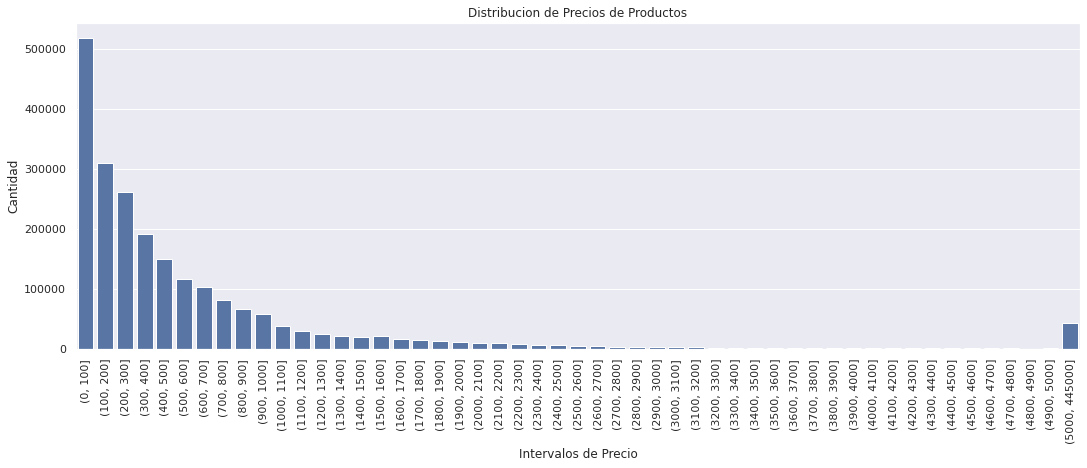

In [ ]:
# Vemos como la cantidad de registros por intervalo de precios
plt.figure(figsize=(18,6))
sns.countplot(ds_psp['precio_intervalo'], color='b')
plt.title("Distribucion de Precios de Productos", size='12')
plt.xlabel("Intervalos de Precio")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()

Podemos observar en el grafico anterior que la gran cantidad de registros se acumula en los precios mas bajos.

Para avanzar con el analisis, enfocaremos la perspectiva en aquellos registros cuyo precio sea menor a 1500.

De esta manera, separamos como **productos de lujo** aquellos >= 1000 y **productos de no lujo** aquellos < 1000

In [ ]:
limite_precios = 1000
ds_no_lujo = ds_psp[ds_psp['precio_normalizado'] < limite_precios].copy()
ds_lujo = ds_psp[ds_psp['precio_normalizado'] >= limite_precios].copy()

In [ ]:
ratio_productos_no_lujo = len(ds_no_lujo) / len(ds_psp)* 100
print("Porcentaje de Precios Nulos:", ratio_productos_no_lujo,'%')

Porcentaje de Precios Nulos: 83.82237938800463 %


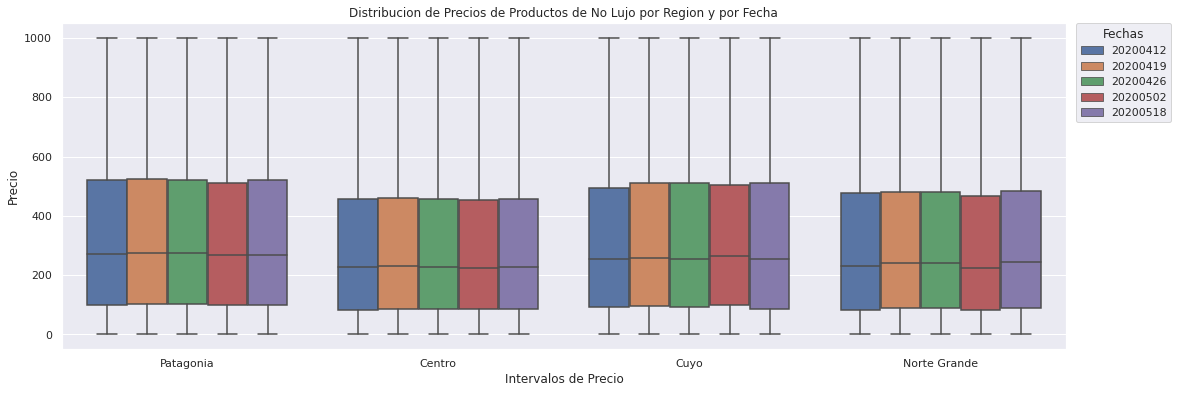

In [ ]:
# Veamos como es la distribucion de los productos de NO lujo por fecha y por region
plt.figure(figsize=(18,6))
sns.boxplot(y='precio_normalizado', x='region', hue='fecha', data=ds_no_lujo)
plt.title("Distribucion de Precios de Productos de No Lujo por Region y por Fecha", size='12')
plt.xlabel("Intervalos de Precio")
plt.ylabel("Precio")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Fechas")
plt.show()


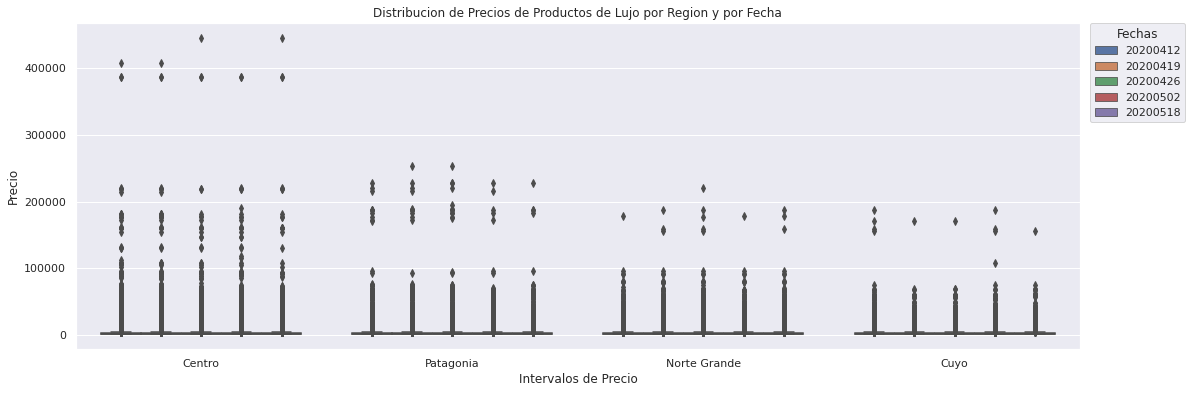

In [ ]:
# Veamos como es la distribucion de los productos de lujo por fecha y por region
plt.figure(figsize=(18,6))
sns.boxplot(y='precio_normalizado', x='region', hue='fecha', data=ds_lujo)
plt.title("Distribucion de Precios de Productos de Lujo por Region y por Fecha", size='12')
plt.xlabel("Intervalos de Precio")
plt.ylabel("Precio")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Fechas")
plt.show()

*Por ultimo vamos a analizar la variacion de los precios de productos de NO Lujo para la region centro y para el primer dia y ultima dia de medicion.*

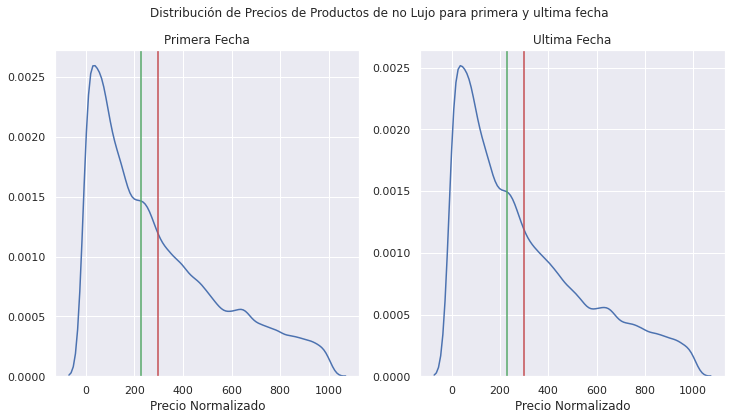

In [ ]:
## CREAMOS LA ESTRUCTURA PARA DOS GRAFICOS
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.suptitle("Distribución de Precios de Productos de no Lujo para primera y ultima fecha", size='12')

## DECLARAMOS LOS FILTROS PRINCIPALES
filtro_region = ds_psp.region == 'Centro'

#####################################################
##### PRIMER GRAFICO - PRIMERA FECHA
#
# Declaramos filtros especificos y calculamos media y mediana
filtro_primera_fecha = ds_no_lujo.fecha == '20200412'
ds_no_lujo_primera_fecha = ds_no_lujo.precio_normalizado[(filtro_primera_fecha) & (filtro_region)]
media_primera_fecha = np.mean(ds_no_lujo_primera_fecha)
mediana_primera_fecha = np.median(ds_no_lujo_primera_fecha)

# Graficamos displot, media y mediana
grafico_1 = sns.distplot(ds_no_lujo_primera_fecha, kde=True, hist=False, ax=ax[0])
grafico_1.set_title('Primera Fecha')
grafico_1.axvline(media_primera_fecha,color='r')
grafico_1.axvline(mediana_primera_fecha, color='g')
grafico_1.set_xlabel('Precio Normalizado')

#####################################################
##### SEGUNDO GRAFICO - SEGUNDA FECHA
#
filtro_segunda_fecha = ds_psp.fecha == '20200518'
ds_no_lujo_segunda_fecha = ds_no_lujo.precio_normalizado[(filtro_segunda_fecha) & (filtro_region)]
media_segunda_fecha = np.mean(ds_no_lujo_segunda_fecha)
mediana_segunda_fecha = np.median(ds_no_lujo_segunda_fecha)

grafico_2 = sns.distplot(ds_no_lujo_segunda_fecha, kde=True, hist=False, ax=ax[1])
grafico_2.set_title('Ultima Fecha')
grafico_2.axvline(media_segunda_fecha,color='r')
grafico_2.axvline(mediana_segunda_fecha, color='g')
grafico_2.set_xlabel('Precio Normalizado')

fig.show()

In [ ]:
print("PRIMERA FECHA -  Media:",media_primera_fecha,"Mediana:",mediana_primera_fecha)
print("SEGUNDA FECHA -  Media:",media_segunda_fecha,"Mediana:",mediana_segunda_fecha)
# Se aprecia un incremento de un poco mas de 1 punto en ambas mediciones

PRIMERA FECHA -  Media: 298.134877912002 Mediana: 227.0
SEGUNDA FECHA -  Media: 299.806848493987 Mediana: 228.6892857142857


# 3. Consignas Disparadoras

## 3. Consignas Disparadoras
A continuación se presenta una serie de ***consignas disparadoras***, a modo de ayuda para encaminar el análisis y la visualización de los datos. Algunas de ellas deberán responderlas de manera obligatoria.

### 3.1 De Respuesta Obligatoria
Elegir un producto representativo (el que quieran, pero tiene que ser exactamente el mismo) que se repita para todas las fechas y se encuentre en todas las provincias. Si no hay alguno que cumpla esta condición, entonces que se encuentre en todas las regiones. Este será nuestro ***bien numerario*** para reexpresar los precios en términos relativos dentro de cada fecha.

Crear una nueva columna con el ***precio relativo*** en términos del bien elegido, por fecha y provincia (o región en su defecto). Es decir, para una fecha y provincia (o región), el precio de cualquier producto ahora quedará expresado en términos del producto elegido, haciendo Pi/PBienNumerario.

Lo que estamos haciendo acá es, básicamente, expresar el valor de los productos en términos de un único bien. Por ejemplo, si eligieron "Arroz Doble Carolina Dos Hermanos 1Kg", el precio relativo de "Cerveza Quilmes 1L" nos dirá cuántos kg de arroz son necesarios para comprar un litro de esa cerveza. Esto nos permite eliminar el factor inflación del análisis, ya que sabemos que los precios aumentan a cierto ritmo, pero no tenemos un índice semanal para deflactarlos (es decir, "sacarles" la inflalción).

Hecho esto, **repetir el análisis estadístico del punto 2 utilizando precios relativos**.

Además,

- Cuál es la correlación entre precios nominales y relativos? Nos sirve de algo este dato?
- Qué productos están en todas las provincias?
- Cómo podemos medir la dispersión de precios? Encontrar una métrica y un elemento de visualización.
- Qué tipos de productos se encuentran entre los más caros? En qué provincia se encuentran mayoritariamente?
- Qué tipos de productos se encuentran entre los más baratos? En qué provincia se encuentran mayoritariamente?
- Cómo se distribuyen los precios por provincia y cadena de proveedor?
- Cuál es la región/provincia con mayor promedio de precios? Y de menor promedio?
- Son estadísticamente distintas las medias de los precios entre dos regiones (las que elijan)?
- Cuál es la probabilidad de que un precio en la provincia de Córdoba se encuentre por arriba de la media nacional?

### 3.2 Adicionales
A modo de ayuda, se propone un listado de preguntas adicionales. Podrán hacer uso de las mismas, aunque no es estrictamente necesario que las respondan. Algunas pueden resultarles de mayor interés que otras.

- Se puede obtener de alguna forma la categoría de los productos a partir de sus nombres?
- Son variables independientes las provincias y las cadenas de supermercados?
- Qué productos no están en todas las provincias?
- Qué marcas no están en todas las provincias?

# Eleccion del bien numerario

In [ ]:
# Busco aquellos productos que aparecen en todas las provincias
prod_prov_count = precio_sucursal_producto.groupby(['producto_id','nom_provincia' ])['producto_id'].nunique().groupby('producto_id').count().reset_index(name='count')
prod_all_prov = prod_prov_count[prod_prov_count['count']==24]['producto_id']

In [ ]:
print("Cantidad de Productos que se encuentran en todas las provincias:", len(prod_all_prov))

Cantidad de Productos que se encuentran en todas las provincias: 641


In [ ]:
# Dataset con todos los registros de los productos que aparecen en todas las provincias
ds_prod_all_prov = ds_psp[ds_psp.producto_id.isin(prod_all_prov)]

In [ ]:
# Listado de Provincias
provincias = ds_psp.nom_provincia.unique()

In [ ]:
# Creo un diccionario que para CADA producto cuenta las provincias en las que aparece en las 5 fechas.
productos_numerarios = dict()
for producto in prod_all_prov:
  filtro_prod = ds_prod_all_prov.producto_id == producto
  for provincia in provincias:
    filtro_prov = ds_prod_all_prov.nom_provincia == provincia
    if len(ds_prod_all_prov[(filtro_prod) & (filtro_prov)].groupby('fecha').count()) == 5:
      productos_numerarios[producto] = productos_numerarios.get(producto, 0) + 1

In [ ]:
# Busco aquellos productos cuyo registro en los 5 dias se realizo en la mayor cantidad de provincias
prod_nums = []
for producto, cantidad in productos_numerarios.items():
  if cantidad > 17: # Fui probando diferentes cantidades hasta que di con 17/18
    prod_nums.append(producto)
    #print(producto)

In [ ]:
# Filtramos el dataset ds_psp con todos los productos candidatos a ser numerarios
ds_numerarios = ds_psp[ds_psp.producto_id.isin(prod_nums)]
ds_numerarios.size

171416

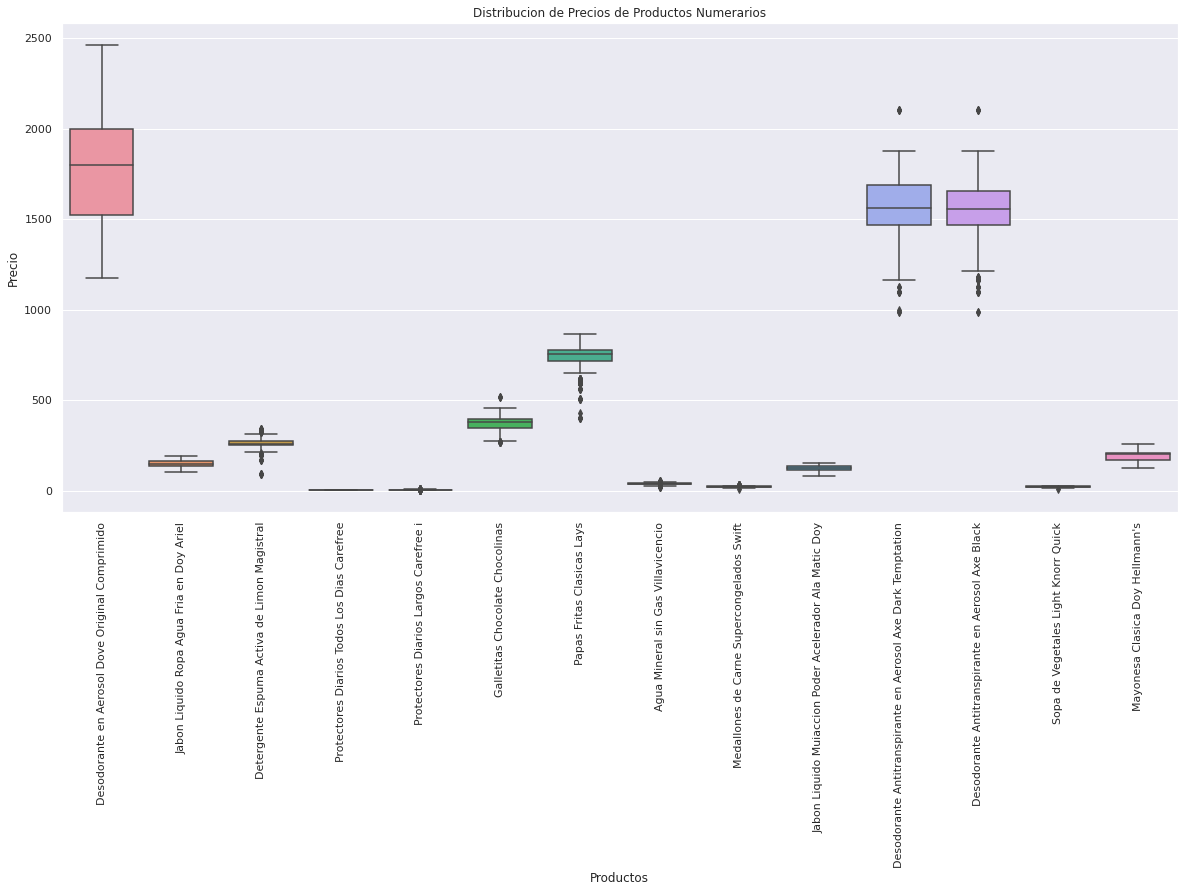

In [ ]:
# Teniendo en el dataset sólo los productos que aparecen en todas las provincias y en
# la mayor cantidad de fechas. Analizamos como se distribuyen sus precios para elegir aquel más representativo
plt.figure(figsize=(20,9))
sns.boxplot(y='precio_normalizado', x='nombre_sin_um', data=ds_numerarios)
plt.title("Distribucion de Precios de Productos Numerarios", size='12')
plt.xlabel("Productos")
plt.ylabel("Precio")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Filtro los productos cuya media sea mayor a 1000 para visualizar mejor el resto
productos_numerarios_mean = ds_numerarios.groupby('producto_id')['precio_normalizado'].mean().reset_index(name='media')
productos_numerarios_caros = productos_numerarios_mean[productos_numerarios_mean.media > 1000]
productos_numerarios_caros

,producto_id,media
0,0000077941824,1789.33063
10,7791293025889,1551.98974
11,7791293028774,1549.77418


In [ ]:
ds_numerarios_baratos = ds_numerarios[~ds_numerarios.producto_id.isin(productos_numerarios_caros.producto_id)]

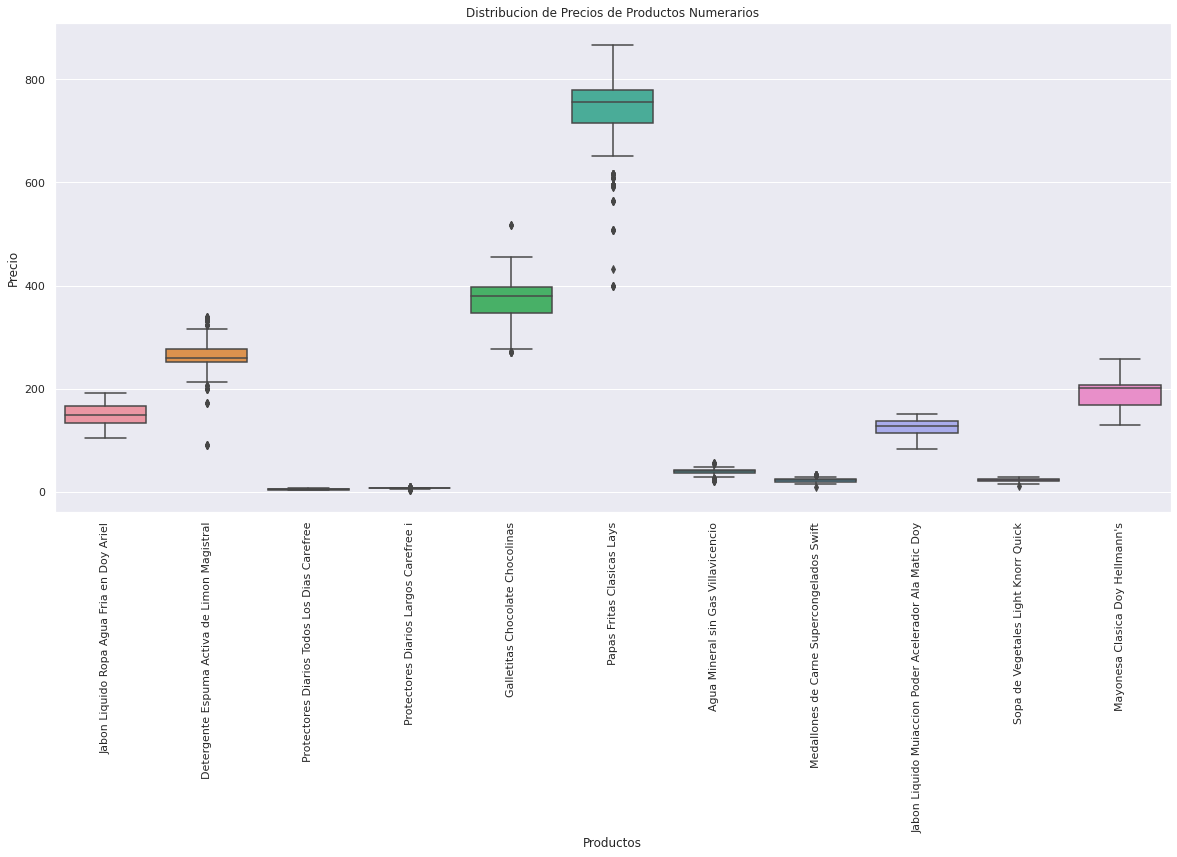

In [ ]:
# Visualicemos los productos restantes
plt.figure(figsize=(20,9))
sns.boxplot(y='precio_normalizado', x='nombre_sin_um', data=ds_numerarios_baratos)
plt.title("Distribucion de Precios de Productos Numerarios", size='12')
plt.xlabel("Productos")
plt.ylabel("Precio")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Veamos la lista de los productos candidatos a ser seleccionaos como bien numerario
ds_numerarios_baratos.groupby(['producto_id','nombre'])['producto_id','nombre'].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,producto_id,nombre
producto_id,nombre,,
7500435004664,Jabon Liquido Ropa Agua Fria en Doypack Ariel 3 Lt,531,531
7500435019248,Detergente Espuma Activa de Limon Magistral 750 Cc,525,525
7790010616751,Protectores Diarios Todos Los Dias Carefree 100 Un,403,403
7790010616812,Protectores Diarios Largos Carefree 60 Uni,387,387
7790040929906,Galletitas Chocolate Chocolinas 170 Gr,435,435
7790310981191,Papas Fritas Clasicas Lays 250 Gr,400,400
7790315000422,Agua Mineral sin Gas Villavicencio 2 Lt,514,514
7790360966797,Medallones de Carne Supercongelados Swift 2 Un,407,407
7791290011205,Jabon Liquido Multiaccion Poder Acelerador Ala Matic Doypack 3 Lt,511,511


In [ ]:
producto_numerario_id = '7794000960077'

In [ ]:
ds_psp['nombre'][ds_psp.producto_id == producto_numerario_id].head(1)

359016    Mayonesa Clasica Doypack Hellmann's 950 Gr
Name: nombre, dtype: object

Considerando que los precios del producto numerario varian segun la fecha, la region y la sucursal, decidimos tomar como precio del producto numerario, aquel correspondiente a la media segun la fecha del registro.

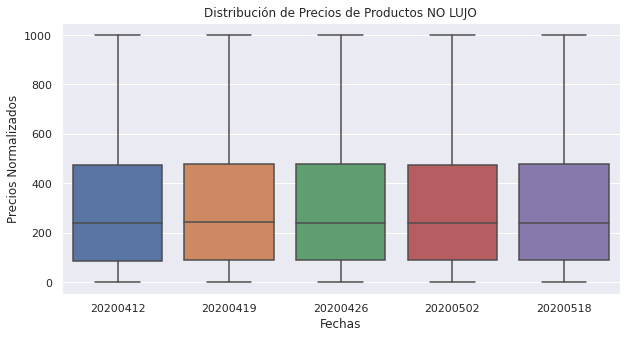

In [ ]:
# Veamos como es la media de los precios de los productos de NO LUJO segúnd el día
plt.figure(figsize=(10,5))
sns.boxplot(x='fecha', y='precio_normalizado', data=ds_no_lujo)
plt.title("Distribución de Precios de Productos NO LUJO", size='12')
plt.xlabel("Fechas")
plt.ylabel("Precios Normalizados")
plt.show()

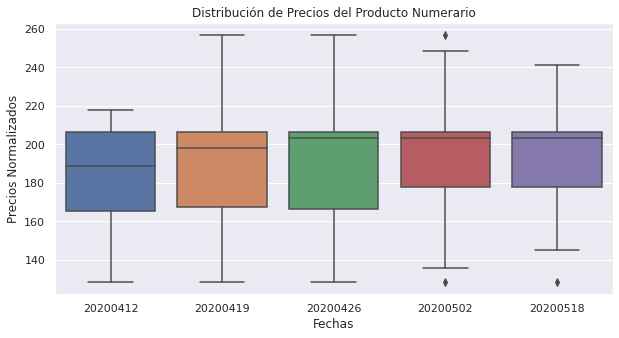

In [ ]:
# De igual manera, repetimos el analisis pero solo con el producto numerario,
plt.figure(figsize=(10,5))
sns.boxplot(x='fecha', y='precio_normalizado', data=ds_no_lujo[ds_no_lujo.producto_id == producto_numerario_id])
plt.title("Distribución de Precios del Producto Numerario", size='12')
plt.xlabel("Fechas")
plt.ylabel("Precios Normalizados")
plt.show()

In [ ]:
# Veamos en detalle la distribucion del precio normalizado del producto numerario
ds_psp[ds_psp.producto_id == producto_numerario_id].groupby('fecha').agg({'precio_normalizado':['count', 'min', 'mean' ,'max']})

precio_normalizado                              
                      count       min      mean       max
fecha                                                    
20200412                 88 128.42105 187.11112 217.89474
20200419                 93 128.42105 189.49949 256.84211
20200426                 94 128.42105 189.43830 256.84211
20200502                 76 128.42105 193.14169 256.84211
20200518                 82 128.42105 190.33825 241.05263

In [ ]:
# Guardamos la media del precio_normalizado del producto numerario de acuerdo a la fecha
producto_numerario_precios_medios = ds_psp[ds_psp.producto_id == producto_numerario_id].groupby('fecha')['precio_normalizado'].mean().to_dict()
producto_numerario_precios_medios

{'20200412': 187.11112440191388,
 '20200419': 189.49949066213918,
 '20200426': 189.43829787234034,
 '20200502': 193.1416897506925,
 '20200518': 190.33825417201535}

**para calcular el precio relativo divido el precio normalizado de los productos por el precio normalizado medio del bien numerario correspondiente a la fecha homóloga**

In [ ]:
ds_psp['precio_relativo'] = ds_psp.apply(lambda x: x['precio_normalizado'] / producto_numerario_precios_medios.get(x['fecha'], 0), axis=1)

In [ ]:
ds_psp[['precio_normalizado', 'fecha', 'precio_relativo']].sample(10)

,precio_normalizado,fecha,precio_relativo
1916018,2885.60000,20200518,15.16038
221463,100.88333,20200412,0.53916
1701461,909.00000,20200502,4.70639
1482174,932.22222,20200502,4.82662
889986,376.76471,20200419,1.98821
913167,749.75000,20200419,3.95648
1378032,229.50000,20200426,1.21148
172401,380.55556,20200412,2.03385
1698734,405.12821,20200502,2.09757
1581657,469.00000,20200502,2.42827


In [ ]:
# Exploramos los datos caracteristicos de la nueva variable
ds_psp['precio_relativo'].describe().apply(lambda x: '%.5f' % x)

count    2214788.00000
mean           4.26586
std           16.48450
min            0.00000
25%            0.58539
50%            1.63564
75%            3.76781
max         2349.04982
Name: precio_relativo, dtype: object

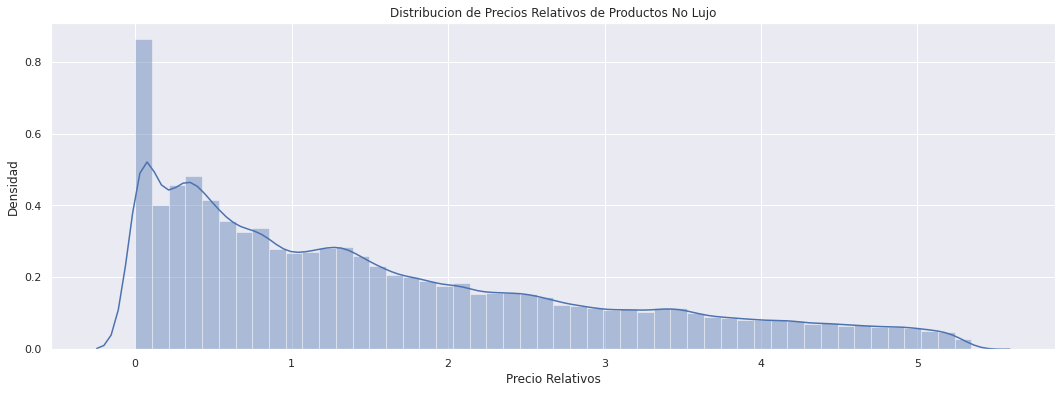

In [ ]:
# Veamos la distribucion de los precios relativos para los productos de NO LUJO
plt.figure(figsize=(18,6))
sns.distplot(ds_psp['precio_relativo'][ds_psp.precio_normalizado < 1000])
plt.title("Distribucion de Precios Relativos de Productos No Lujo", size='12')
plt.xlabel("Precio Relativos")
plt.ylabel("Densidad")
plt.show()

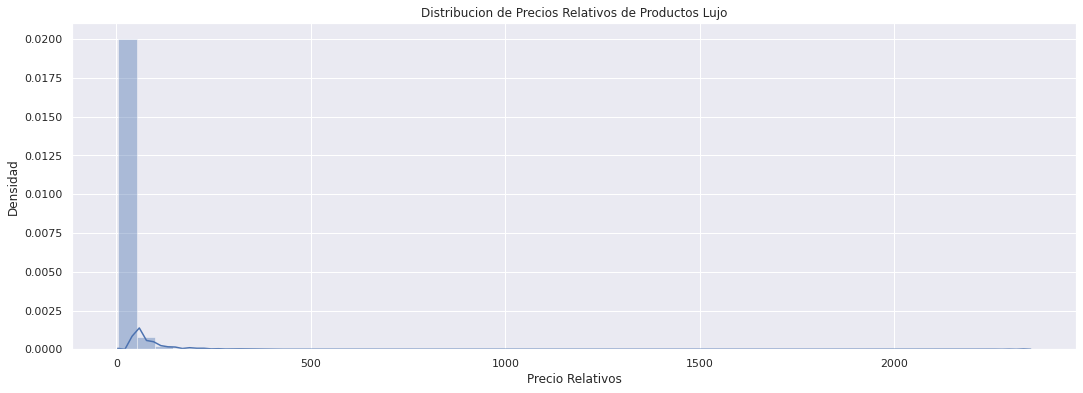

In [ ]:
# Veamos la distribucion de los precios relativos para los productos de LUJO
plt.figure(figsize=(18,6))
sns.distplot(ds_psp['precio_relativo'][ds_psp.precio_normalizado >= 1000])
plt.title("Distribucion de Precios Relativos de Productos Lujo", size='12')
plt.xlabel("Precio Relativos")
plt.ylabel("Densidad")
plt.show()

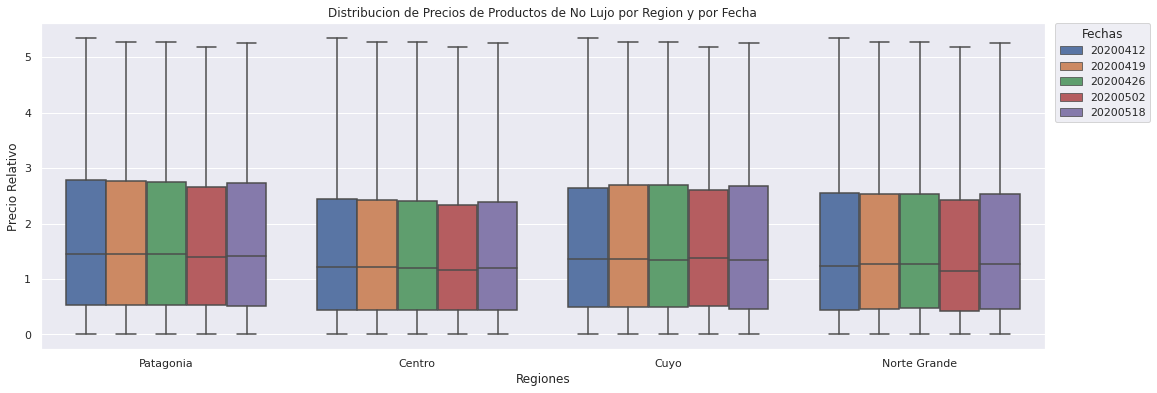

In [ ]:
# Como hicimos anteriormente, veamos como es la distribucion del precio numerario de los productos NO lujo 
# (antes considerados por el precio_normalizado) por fecha y por region
plt.figure(figsize=(18,6))
sns.boxplot(y='precio_relativo', x='region', hue='fecha', data=ds_psp[ds_psp.precio_normalizado < 1000])
plt.title("Distribucion de Precios de Productos de No Lujo por Region y por Fecha", size='12')
plt.xlabel("Regiones")
plt.ylabel("Precio Relativo")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Fechas")
plt.show()

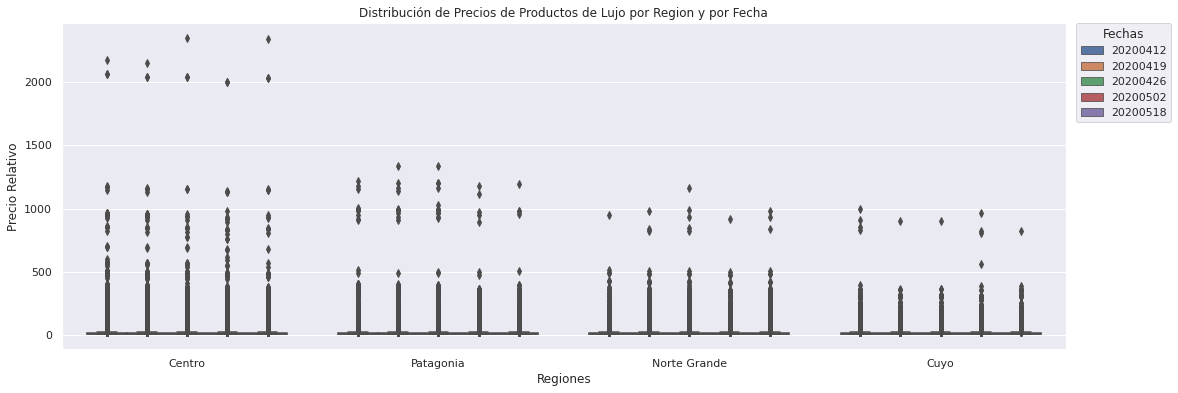

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(y='precio_relativo', x='region', hue='fecha', data=ds_psp[ds_psp.precio_normalizado > 1000])
plt.title("Distribución de Precios de Productos de Lujo por Region y por Fecha", size='12')
plt.xlabel("Regiones")
plt.ylabel("Precio Relativo")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Fechas")
plt.show()

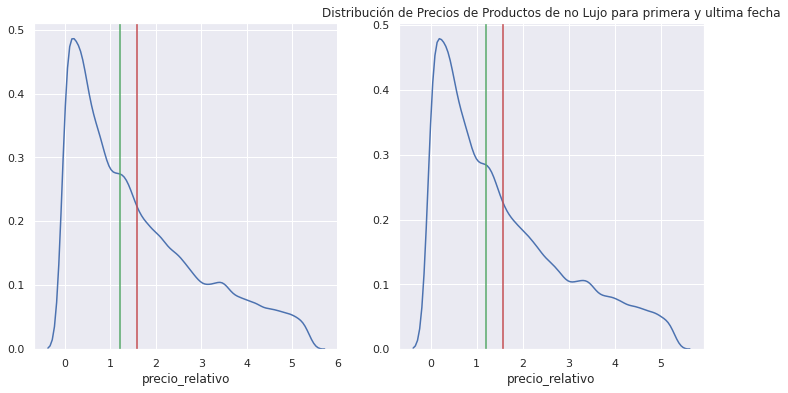

In [ ]:
## Veamos como fue variando la media de los precios de LUJO desde el primer día hasta el último
# Para ellos actualizamos las dataframe ds_no_lujo y ds_lujo ya que no contienen la variable precio_relativo

ds_no_lujo = ds_psp[ds_psp['precio_normalizado'] < limite_precios].copy()
ds_lujo = ds_psp[ds_psp['precio_normalizado'] >= limite_precios].copy()

## CREAMOS LA ESTRUCTURA PARA DOS GRAFICOS
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.title("Distribución de Precios de Productos de no Lujo para primera y ultima fecha", size='12')

## DECLARAMOS LOS FILTROS PRINCIPALES
filtro_region = ds_psp.region == 'Centro'

#####################################################
##### PRIMER GRAFICO - PRIMERA FECHA
#
# Declaramos filtros especificos y calculamos media y mediana
filtro_primera_fecha = ds_no_lujo.fecha == '20200412'
ds_no_lujo_primera_fecha = ds_no_lujo.precio_relativo[(filtro_primera_fecha) & (filtro_region)]
media_primera_fecha = np.mean(ds_no_lujo_primera_fecha)
mediana_primera_fecha = np.median(ds_no_lujo_primera_fecha)

# Graficamos displot, media y mediana
grafico_1 = sns.distplot(ds_no_lujo_primera_fecha, kde=True, hist=False, ax=ax[0])
grafico_1.axvline(media_primera_fecha,color='r')
grafico_1.axvline(mediana_primera_fecha, color='g')


#####################################################
##### SEGUNDO GRAFICO - SEGUNDA FECHA
#
filtro_segunda_fecha = ds_psp.fecha == '20200518'
ds_no_lujo_segunda_fecha = ds_no_lujo.precio_relativo[(filtro_segunda_fecha) & (filtro_region)]
media_segunda_fecha = np.mean(ds_no_lujo_segunda_fecha)
mediana_segunda_fecha = np.median(ds_no_lujo_segunda_fecha)
grafico_2 = sns.distplot(ds_no_lujo_segunda_fecha, kde=True, hist=False, ax=ax[1])
grafico_2.axvline(media_segunda_fecha,color='r')
grafico_2.axvline(mediana_segunda_fecha, color='g')

fig.show()

In [ ]:
##vuelvo a quedarme con los dos dataset de precios de lujo y no lujo

limite_precios = 1000
ds_no_lujo2 = ds_psp[ds_psp['precio_normalizado'] < limite_precios].copy()
ds_lujo2 = ds_psp[ds_psp['precio_normalizado'] >= limite_precios].copy()

In [ ]:
# Es interesante notar los registros de la region Centro que se encuentran por encima de los 30000.
ds_lujo[['nombre','precio','unidad','precio_normalizado', 'precio_relativo']][(ds_lujo.precio > 30000) & (ds_lujo.region == 'Centro')]

,nombre,precio,unidad,precio_normalizado,precio_relativo
953034,Champagne Rose Estuche Dom Perignon 750 Cc 1 Un,31000.00000,cc,41333.33333,218.18890
961750,Whisky 25 Años Chivas Regal 700 Ml,32469.00000,ml,46384.28571,244.85168
1815078,Whisky Chivas Regal con Volca 4.5 Lt,35900.00000,lt,7977.77778,41.91369
1815079,Whisky Chivas Regal con Volca 4.5 Lt,35900.00000,lt,7977.77778,41.91369
1815206,Whisky Royal Salute Chivas Regal 700 Ml,32900.00000,ml,47000.00000,246.92882
1815207,Whisky Royal Salute Chivas Regal 700 Ml,32900.00000,ml,47000.00000,246.92882


In [ ]:
ds_psp['precio_relativo'].describe().apply(lambda x: '%.5f' % x)

count    2214788.00000
mean           4.26586
std           16.48450
min            0.00000
25%            0.58539
50%            1.63564
75%            3.76781
max         2349.04982
Name: precio_relativo, dtype: object

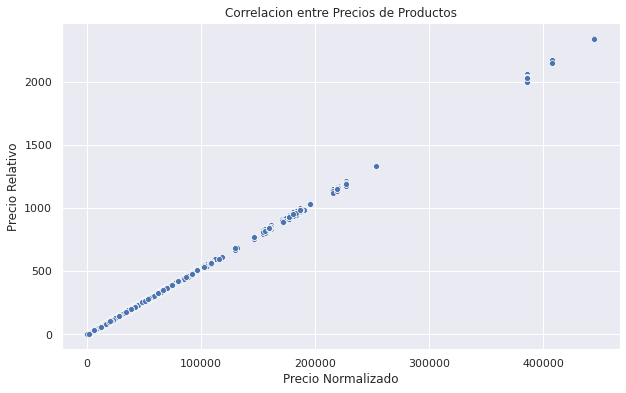

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='precio_relativo', x='precio_normalizado', data=ds_psp)
plt.title("Correlacion entre Precios de Productos", size='12')
plt.xlabel("Precio Normalizado")
plt.ylabel("Precio Relativo")
plt.show()

**1)Cuál es la correlación entre precios nominales y relativos? Nos sirve de algo este dato?**

Coeficiente de correlacion de pearson



In [ ]:
print(ds_psp[['precio_normalizado', 'precio_relativo']].corr(method='pearson'))


                    precio_normalizado  precio_relativo
precio_normalizado             1.00000          0.99995
precio_relativo                0.99995          1.00000


**2)Qué productos están en todas las provincias?**

In [ ]:
#Utilizamos la variable creada en el apartado de "Eleccion Bien Numerario"
ds_prod_all_prov.groupby(['producto_id', 'nombre_sin_um'])['producto_id', 'nombre_sin_um'].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,producto_id,nombre_sin_um
producto_id,nombre_sin_um,,
0000077900067,Manteca Extra Firme Ilolay,235,235
0000077903501,Galletitas Obleas Rellena Opera,212,212
0000077941824,Desodorante en Aerosol Dove Original Comprimido,348,348
0000077956262,Sal Fina en Salero Celusal,266,266
0000078923454,Desodorante Roll On Men V8 Rexona,262,262
...,...,...,...
7899026484603,Shampoo Reparacion Total 5 Elvive Loreal Paris,219,219
7899026484627,Acondicionador Reparacion Total 5 Elvive,211,211
7899706115001,Coloracion Tono 30 Expresso Nutrisse,232,232


5)**Qué tipos de productos se encuentran entre los más caros? En qué provincia se encuentran mayoritariamente?**

In [ ]:
ds_psp[['producto_id', 'nombre', 'presentacion','unidad','cantidad','precio_normalizado','precio_relativo']] \
          .groupby(['producto_id', 'nombre','presentacion','unidad','cantidad' ]) \
          .agg({'precio_relativo':'mean','precio_normalizado':'mean'}).sort_values('precio_relativo',ascending=False)[:10]

,,,,,precio_relativo,precio_normalizado
producto_id,nombre,presentacion,unidad,cantidad,,
0041554443493,Mascara para Pestañas Maybelline Falsies 2 Gr,2.0 gr,gr,2.00000,2164.12588,407500.00000
7790577000246,Vino Tinto Estuche Madera San Felipe 3 Un 750 Cc,2.25 cc,cc,2.25000,2033.96912,386222.22222
0041554220186,Delineador de Ojo Maybelline Studio Last 3 Gr,3.0 gr,gr,3.00000,1141.80875,215000.00000
7790580117757,Huevo de Chocolate con Leche Toy Story Arcor 50 Gr,1.0 gr,gr,1.00000,1097.70650,208190.95238
7790520022462,Repuesto Aromatizante en Gel Manzana y Canela Glade Sensations 8 Gr,1.0 gr,gr,1.00000,921.50564,174686.53846
3348900417892,Perfume Dior J Adore Mujer 30 Ml,30.0 ml,ml,30.00000,911.61426,173000.00000
7790520024688,Aromatizante Acqua Full Glade Electric Car 3.2 Ml,3.2 ml,ml,3.20000,907.44125,172080.33854
7790314065170,Vino Cabernet Sauvignon Canciller 1.125 Ml,1.125 ml,ml,1.12500,902.68679,171339.51036
8411061781197,Perfume Carolina Herrera 212 Vip Rose 30 Ml,30.0 ml,ml,30.00000,851.89387,161666.66667


Podemos observar que al hacer la normalizacion de precios algunas inconsistencias en la extraccion de valores de nombres o al enlazar diferentes fuentes de datos tienen un impacto directo en el valor resultante de la normalizacion, por ejemplo:

> **Alimento para Perros Adulto Carne Pollo y Cereal Pedigree 1.5 Kg**
1. Segun la descripcion del producto la presentacion es de '1.5 Kg'
2. Ahora bien, considerando la valor de la variable unidad que acompaña al registro, ésta indica 'gr' 

> **Huevo de Chocolate con Leche Toy Story Arcor 50 Gr**
1. Segun la descripcion del producto la presentacion es de '50 Gr'
2. De acuerdo al valor de la varible cantidad que acompaña al registro, ésta indica '1'


Consideramos continuar con la etapa de curacion de datos para el próximo práctico

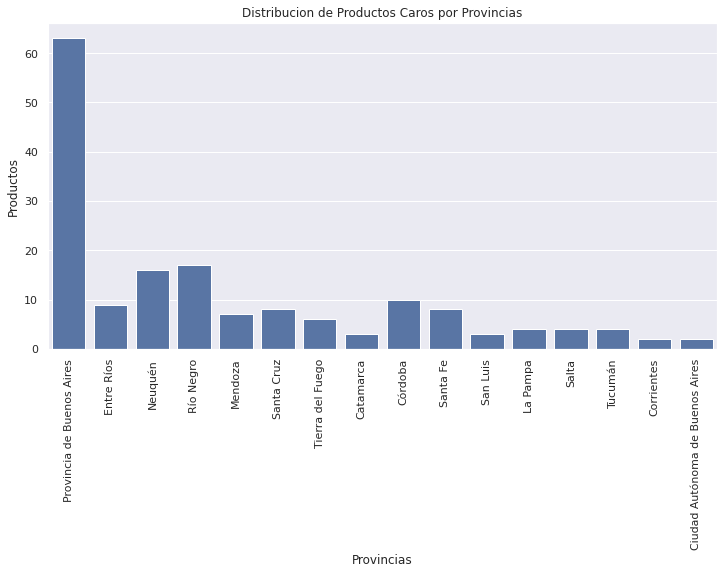

In [ ]:
#Veamos ahora en que provincias se encuentran algunos de estos productos:
plt.figure(figsize=(12, 6))
prod_caros_list = ds_psp[['producto_id', 'nombre', 'presentacion','unidad','cantidad','precio_normalizado','precio_relativo']] \
          .groupby(['producto_id', 'nombre','presentacion','unidad','cantidad' ]) \
          .agg({'precio_relativo':'mean','precio_normalizado':'mean'}).sort_values('precio_relativo',ascending=False)[:10].reset_index().producto_id

sns.countplot(x='nom_provincia', data=ds_psp[ds_psp.producto_id.isin(prod_caros_list)], color='b')
plt.title("Distribucion de Productos Caros por Provincias", size='12')
plt.xlabel("Provincias")
plt.ylabel("Productos")
plt.xticks(rotation=90)
plt.show()

**6) Qué tipos de productos se encuentran entre los más baratos? En qué provincia se encuentran mayoritariamente?**

In [ ]:
ds_psp[['producto_id', 'nombre', 'presentacion','unidad','cantidad','precio_normalizado','precio_relativo']] \
          .groupby(['producto_id', 'nombre','presentacion','unidad','cantidad' ]) \
          .agg({'precio_relativo':'mean','precio_normalizado':'mean'}).sort_values('precio_relativo',ascending=True)[:10]

,,,,,precio_relativo,precio_normalizado
producto_id,nombre,presentacion,unidad,cantidad,,
7790580108304,Caramelos de Leche Dulcilac 120 Un,120.0 un,un,120.00000,0.00001,0.00258
7798049590233,Papel Higienico Gamuza 240 Mt,240.0 mt,mt,240.00000,0.00005,0.00912
7798049590189,Papel Higienico Natural Gamuza 360 Mt,360.0 mt,mt,360.00000,0.00007,0.01386
7798049590417,Papel Higienico Gamuza 300 Mt,300.0 mt,mt,300.00000,0.00009,0.01597
7791415000053,Palillero Fade Lince 150 Un,150.0 un,un,150.00000,0.00009,0.01660
7790122007164,Escarbadiente JR 60 Un,60.0 un,un,60.00000,0.00011,0.02000
7798049590141,Papel Higienico Blanco Gamuza 180 Mt,180.0 mt,mt,180.00000,0.00011,0.02106
7798063140087,Barrita de Cereal Tunki Crock 13 Gr,13.0 un,un,13.00000,0.00014,0.02692
7791854000089,Papel Higienico Mega Family Pack 2 Un 90 Mt,180.0 mt,mt,180.00000,0.00016,0.03050


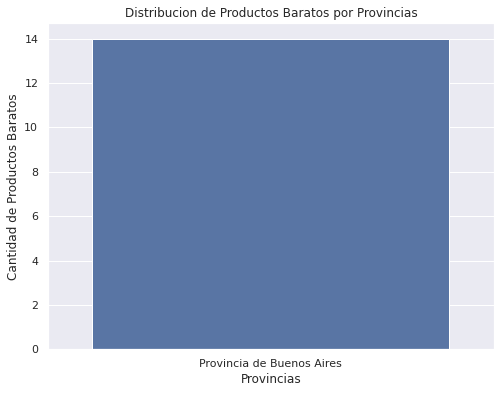

In [ ]:
#Veamos ahora en que provincias se encuentran algunos de estos productos:
plt.figure(figsize=(8, 6))
prod_baratos_list = ds_psp[['producto_id', 'nombre', 'presentacion','unidad','cantidad','precio_normalizado','precio_relativo']] \
          .groupby(['producto_id', 'nombre','presentacion','unidad','cantidad' ]) \
          .agg({'precio_relativo':'mean','precio_normalizado':'mean'}).sort_values('precio_relativo',ascending=True)[:10].reset_index().producto_id

sns.countplot(x='nom_provincia', data=ds_psp[ds_psp.producto_id.isin(prod_baratos_list)], color='b')
plt.title("Distribucion de Productos Baratos por Provincias", size='12')
plt.xlabel("Provincias")
plt.ylabel("Cantidad de Productos Baratos")
plt.show()

**7)Cómo se distribuyen los precios por provincia y cadena de proveedor?** LISTO

- Por provincia

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning:

invalid value encountered in true_divide



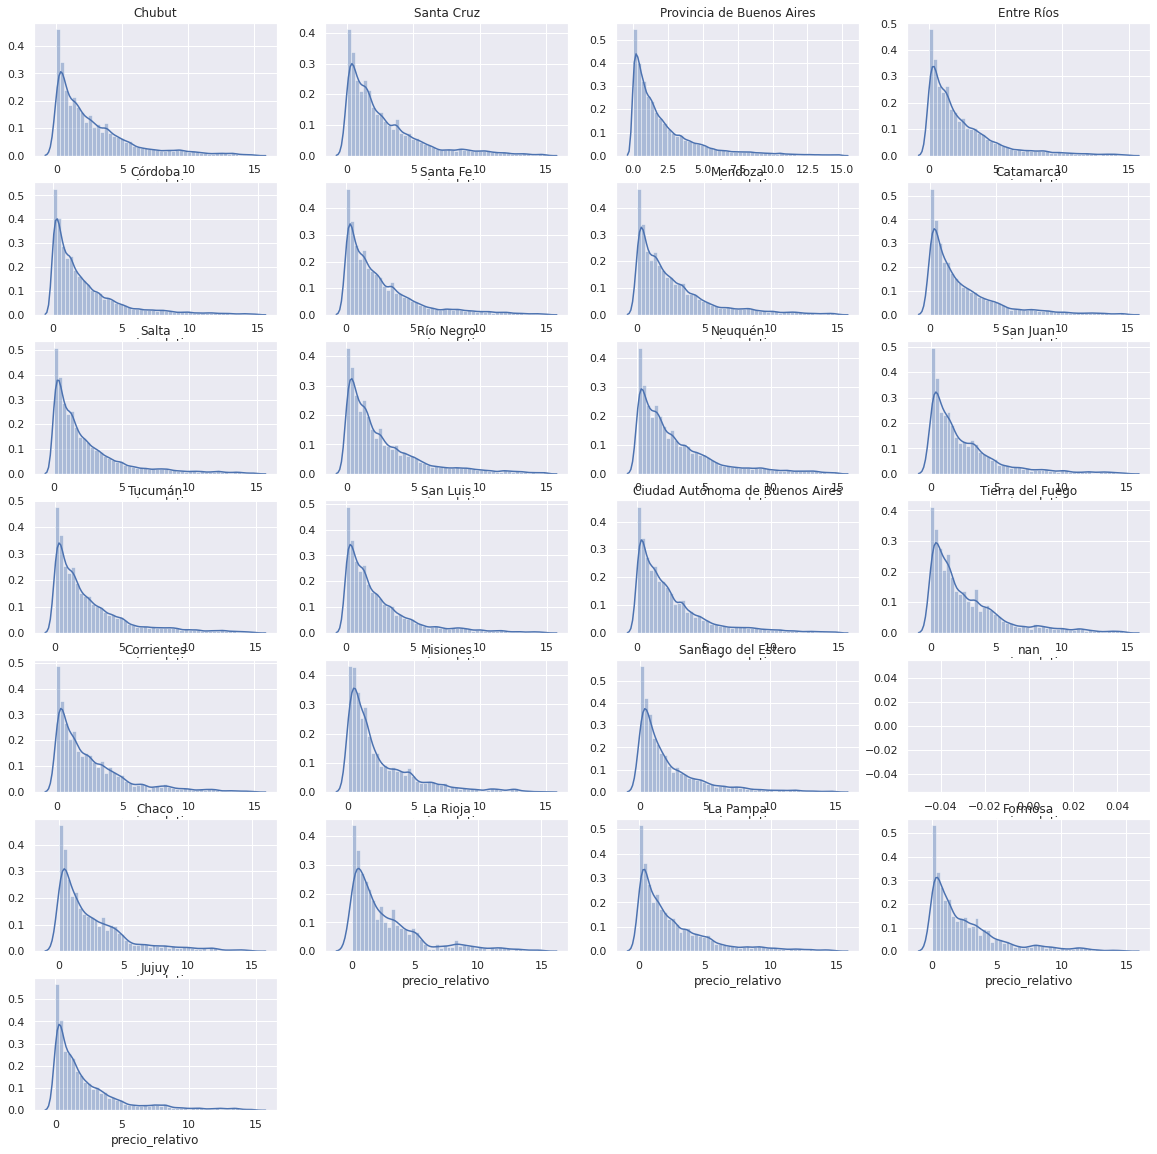

In [ ]:
ds_psp_short = ds_psp[['nom_provincia', 'sucursal_id', 'fecha', 'precio_relativo']]
i=1

plt.rcParams.update({'figure.max_open_warning': 0})
plt.figure(figsize=(20,20))
for provincia in ds_psp_short['nom_provincia'].unique():
  plt.subplot(7,4,i)
  sns.distplot(ds_psp[(ds_psp_short.nom_provincia == provincia) & (ds_psp_short.precio_relativo < 15)]['precio_relativo'])
  plt.title(provincia)

  i+=1

- Sucursal

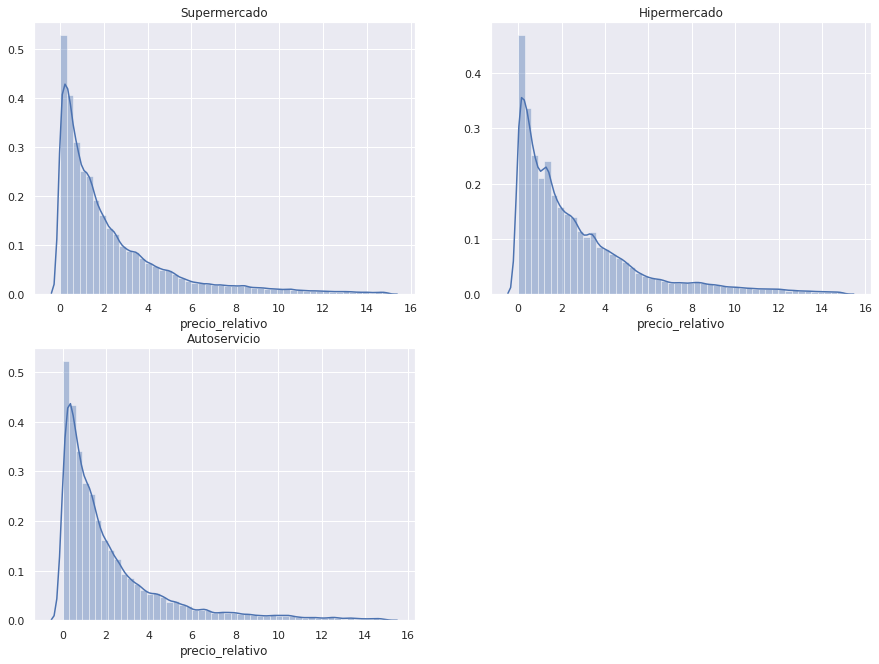

In [ ]:
#ds_psp_short.groupby('sucursal_id').count().max(level=0)
#ds_psp_short.groupby(["sucursal_id"])['sucursal_id'].count().sort_values(ascending=False).head(10)
#ds_psp_short.groupby('sucursal_id').count().agg(['max'])

ds_psp_short = ds_psp[['sucursalTipo', 'fecha', 'precio_relativo']]
i=1
plt.rcParams.update({'figure.max_open_warning': 0})
plt.figure(figsize=(15,11))
for sucursal in ds_psp_short['sucursalTipo'].dropna().unique():
    plt.subplot(2,2,i)
    sns.distplot(ds_psp[(ds_psp_short.sucursalTipo == sucursal) & (ds_psp_short.precio_relativo < 15)]['precio_relativo'])
    plt.title(sucursal)
    i+=1

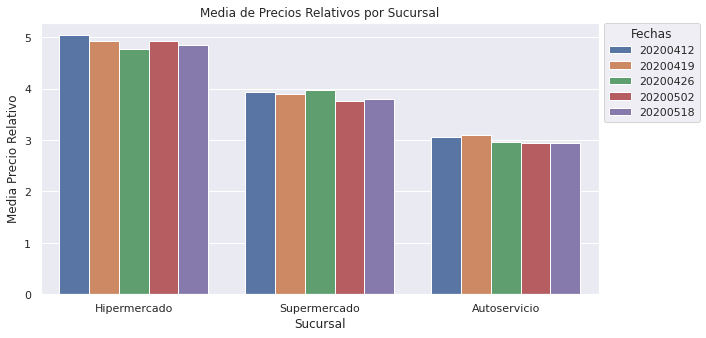

In [ ]:
media_pr_suc = ds_psp.groupby(['sucursalTipo','fecha'])['precio_relativo'].mean().reset_index().sort_values('precio_relativo',ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='sucursalTipo', data=media_pr_suc, y='precio_relativo', hue='fecha', ci=None)
plt.title("Media de Precios Relativos por Sucursal", size='12')
plt.xlabel("Sucursal")
plt.ylabel("Media Precio Relativo")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Fechas")
plt.show()


**8) ¿Cuál es la región/provincia con mayor promedio de precios? Y de menor promedio?**

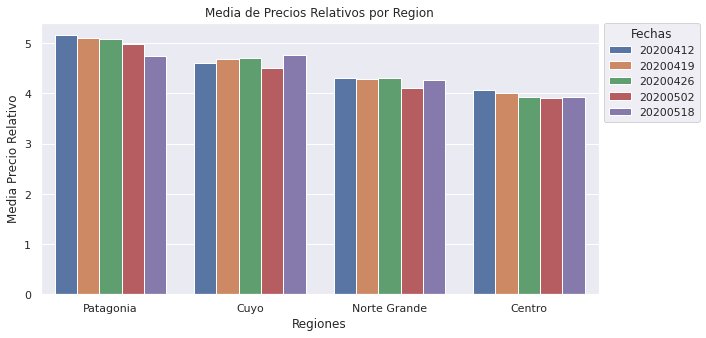

In [ ]:
# Calculamos la media de los precios relativos de las region y las ordenamos de mayor a menor
# para que el gráfico se vea mejor
media_pr_region = ds_psp.groupby(['region','fecha'])['precio_relativo'].mean().reset_index().sort_values('precio_relativo',ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='region', data=media_pr_region, y='precio_relativo', hue='fecha', ci=None)
plt.title("Media de Precios Relativos por Region", size='12')
plt.xlabel("Regiones")
plt.ylabel("Media Precio Relativo")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Fechas")
plt.show()


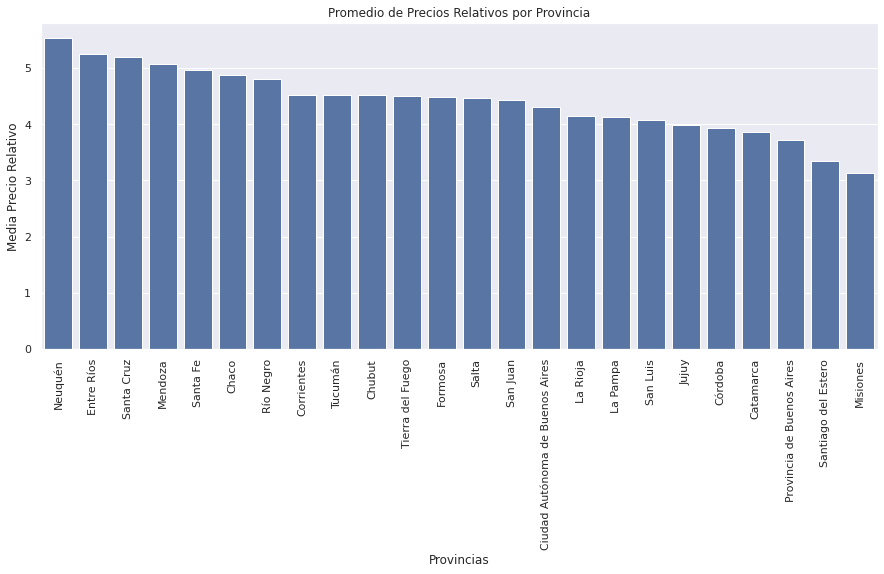

In [ ]:
# Calculamos la media de los precios relativos de las provincias y las ordenamos de mayor a menor
# para que el gráfico se vea mejor
media_pr_prov = ds_psp.groupby('nom_provincia')['precio_relativo'].mean().reset_index().sort_values('precio_relativo',ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x='nom_provincia', data=media_pr_prov, y='precio_relativo', ci=None, color='b')
plt.title("Promedio de Precios Relativos por Provincia", size='12')
plt.xlabel("Provincias")
plt.ylabel("Media Precio Relativo")
plt.xticks(rotation=90)
plt.show()

**9) Promedios estadisticamente distintos (test de hipotesis entre dos regiones)**

In [ ]:
###TEST DIFERENCIA DE MEDIAS PARA MUESTRAS INDEPENDIENTES
from scipy.stats import ttest_ind

cat1 = ds_psp[ds_psp['region']=='Patagonia']
cat2 = ds_psp[ds_psp['region']=='Cuyo']

ttest_ind(cat1['precio_relativo'], cat2['precio_relativo'])

Ttest_indResult(statistic=7.937912703428474, pvalue=2.0597377566101198e-15)

**10) probabilidad que un precio de la provincia de cordoba este por arriba de la media nacional.**

In [ ]:
## num= cantidad de precios que estan arriba de la media poblacional =34096
## denominador= cantidad de registros con precios relativos 

#ds_psp.precio_relativo.mean()

medianacional=4.26
ds_cba= ds_psp[ds_psp['nom_provincia'] == 'Córdoba'].copy()
ds_cba2 = ds_cba[ds_cba['precio_relativo'] > medianacional].copy()
probabilidad=ds_cba2.precio_relativo.count()/ds_cba.precio_relativo.count()
print(probabilidad)

0.19548889424014126


## Entregables
Los entregables son la **notebook** con el análisis realizado y el **informe**.

**Fecha de Entrega ~ 29/06**

# Algo de Background: Precios Relativos

Cuando hablamos de precios relativos, nos referimos a expresar el valor de los bienes en términos de otro bien dado. En el ejemplo planteado, todos los precios nos dirán cuántos kilos de arroz vale cada producto.

Entonces, si reexpresamos los precios de este modo, ya no va a importar si el arroz aumentó nominalmente de precio en alguna fecha en particular, porque un kg de arroz siempre va a valer un kg de arroz. Lo mismo para cualquier producto, sólo que entre fecha y fecha sí puede variar cuántos kilos de arroz son necesarios para comprar determinado producto.

Así, por ejemplo, hoy pueden ser necesarios 1.1 kg de arroz para comprar 1L de cerveza, pero la semana que viene se puede necesitar sólo 1kg. Este cambio en los precios relativos es lo que nos permite determinar que un producto se abarató en términos de otro. En particular para este caso, la cerveza se abarató en términos del arroz.

Para mayor información, pueden consultar los siguientes links, en donde encontrarán los fundamentos:
- http://economiaparatodos.net/importancia-de-los-precios-relativos-2/
- https://guiasjuridicas.wolterskluwer.es/Content/Documento.aspx?params=H4sIAAAAAAAEAMtMSbF1jTAAASNTIzNztbLUouLM_DxbIwMDS0NDQ7BAZlqlS35ySGVBqm1aYk5xKgB3aYC7NQAAAA==WKE#:~:text=Se%20define%20un%20precio%20relativo,en%20t%C3%A9rminos%20de%20otro%20bien.&text=Matem%C3%A1ticamente%20hablando%2C%20un%20precio%20relativo,unidad%20adicional%20de%20otro%20bien.